In [1]:
# Import DataScience Libraries for calculations, visualizations, and plots
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Skip warning messages for cleaner output & display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Market Basket Dataset into Dataframe
teleco = pd.read_csv('teleco_market_basket.csv')

In [3]:
# Verify features in the dataset
teleco.columns

Index(['Item01', 'Item02', 'Item03', 'Item04', 'Item05', 'Item06', 'Item07',
       'Item08', 'Item09', 'Item10', 'Item11', 'Item12', 'Item13', 'Item14',
       'Item15', 'Item16', 'Item17', 'Item18', 'Item19', 'Item20'],
      dtype='object')

In [4]:
# Verify features and records in the dataset
teleco.shape

(15002, 20)

In [5]:
# Verify records present in dataset
teleco.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display descriptive statistics of basket dataset
teleco.describe()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Apple USB-C Charger cable,USB 2.0 Printer cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,ARRIS SURFboard SB8200 Cable Modem,HOVAMP iPhone charger,SanDisk Ultra 128GB card,Brother Genuine High Yield Toner Cartridge,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [7]:
# List feature's data types for data cleaning preparation
teleco.dtypes

Item01    object
Item02    object
Item03    object
Item04    object
Item05    object
Item06    object
Item07    object
Item08    object
Item09    object
Item10    object
Item11    object
Item12    object
Item13    object
Item14    object
Item15    object
Item16    object
Item17    object
Item18    object
Item19    object
Item20    object
dtype: object

In [8]:
# Verify if existing missing records in the dataset
data_nulls = teleco.isnull().sum()
print(data_nulls)

Item01     7501
Item02     9255
Item03    10613
Item04    11657
Item05    12473
Item06    13138
Item07    13633
Item08    14021
Item09    14348
Item10    14607
Item11    14746
Item12    14848
Item13    14915
Item14    14955
Item15    14977
Item16    14994
Item17    14998
Item18    14998
Item19    14999
Item20    15001
dtype: int64


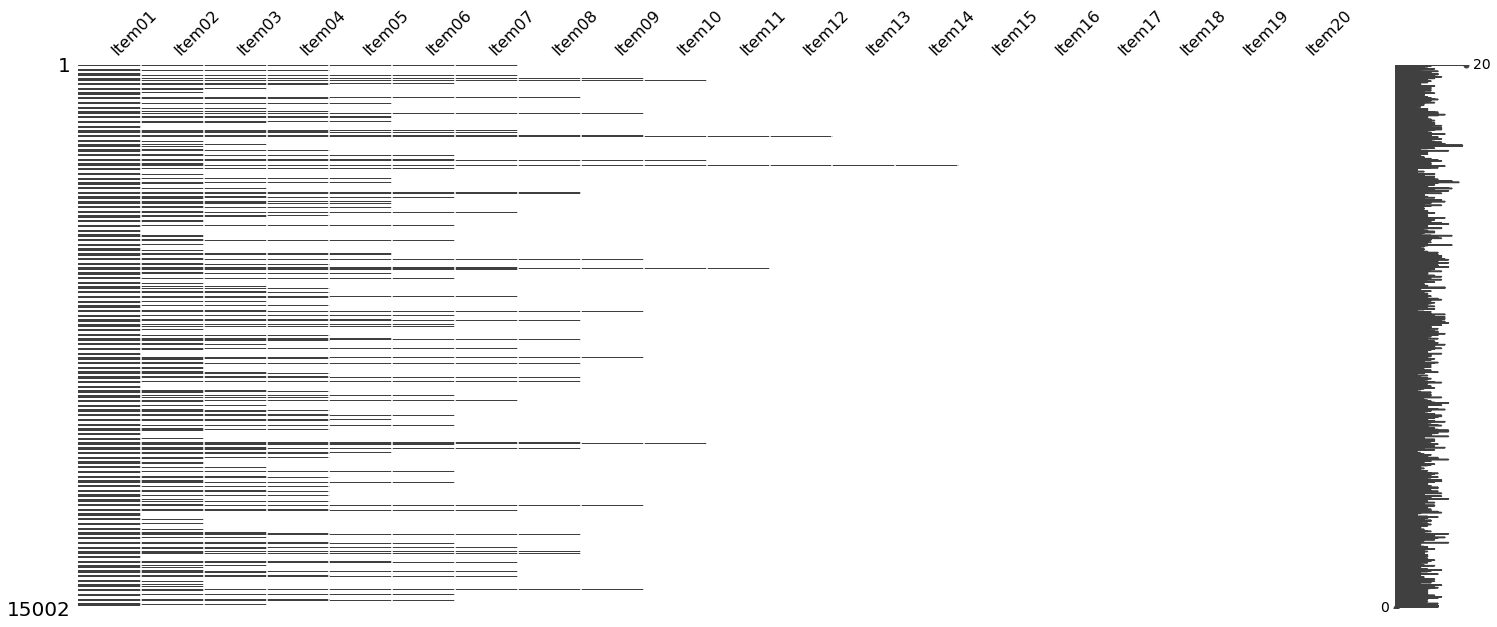

In [9]:
# Utilize missingno library to visualize missing data

!pip install missingno

import missingno as msno

# Display visualization
msno.matrix(teleco);

In [10]:
# Remove records with no data contained
teleco.dropna(how='all', inplace=True)

# Verify changes
teleco.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Changes values containing NaN to 0 for calculation
teleco.fillna(0, inplace=True)

In [12]:
# Display new record size and verify features
teleco.shape

(7501, 20)

In [13]:
# Verify NaN values now display 0 value
teleco.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,UNEN Mfi Certified 5-pack Lightning Cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Cat8 Ethernet Cable,HP 65 ink,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Verify non-existing null values
teleco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 1 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  7501 non-null   object
 2   Item03  7501 non-null   object
 3   Item04  7501 non-null   object
 4   Item05  7501 non-null   object
 5   Item06  7501 non-null   object
 6   Item07  7501 non-null   object
 7   Item08  7501 non-null   object
 8   Item09  7501 non-null   object
 9   Item10  7501 non-null   object
 10  Item11  7501 non-null   object
 11  Item12  7501 non-null   object
 12  Item13  7501 non-null   object
 13  Item14  7501 non-null   object
 14  Item15  7501 non-null   object
 15  Item16  7501 non-null   object
 16  Item17  7501 non-null   object
 17  Item18  7501 non-null   object
 18  Item19  7501 non-null   object
 19  Item20  7501 non-null   object
dtypes: object(20)
memory usage: 1.2+ MB


In [15]:
# Convert telco dataframe into a list for further calculation
teleco_list = []
for i in range(0, 7501):
    teleco_list.append([str(teleco.values[i, j]) for j in range(0, 20)])
teleco_cleaned = pd.DataFrame(teleco_list)

In [16]:
# Verify cleaned dataframe
teleco_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
1,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,UNEN Mfi Certified 5-pack Lightning Cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cat8 Ethernet Cable,HP 65 ink,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Extract cleaned market basket dataset
teleco_cleaned.to_csv('market_basket_prepared.csv')

In [18]:
# List features or items available for purchase
teleco_list[:1]

[['Logitech M510 Wireless mouse',
  'HP 63 Ink',
  'HP 65 ink',
  'nonda USB C to USB Adapter',
  '10ft iPHone Charger Cable',
  'HP 902XL ink',
  'Creative Pebble 2.0 Speakers',
  'Cleaning Gel Universal Dust Cleaner',
  'Micro Center 32GB Memory card',
  'YUNSONG 3pack 6ft Nylon Lightning Cable',
  'TopMate C5 Laptop Cooler pad',
  'Apple USB-C Charger cable',
  'HyperX Cloud Stinger Headset',
  'TONOR USB Gaming Microphone',
  'Dust-Off Compressed Gas 2 pack',
  '3A USB Type C Cable 3 pack 6FT',
  'HOVAMP iPhone charger',
  'SanDisk Ultra 128GB card',
  'FEEL2NICE 5 pack 10ft Lighning cable',
  'FEIYOLD Blue light Blocking Glasses']]

In [19]:
# Install Apriori to utilize algorithm for association rules
!pip install apyori
from apyori import apriori

# Use algorithm to train dataset
rule_list = apriori(teleco_list, min_support = 0.003, min_confidence = 0.3, min_lift = 3, min_length = 2)

In [20]:
# List generated rules from Apriori algorithm
rule_list = list(rule_list)
print(rule_list[0])

RelationRecord(items=frozenset({'5pack Nylon Braided USB C cables', 'HP 63XL Ink'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5pack Nylon Braided USB C cables'}), items_add=frozenset({'HP 63XL Ink'}), confidence=0.3006993006993007, lift=3.790832696715049)])


In [21]:
# Display amount of rules generated
print(len(rule_list))

102


In [22]:
# Create results variable from Apriori rules list
results = pd.DataFrame(rule_list)

In [23]:
# Display results
results

,items,support,ordered_statistics
0,"(5pack Nylon Braided USB C cables, HP 63XL Ink)",0.005733,"[((5pack Nylon Braided USB C cables), (HP 63XL..."
1,"(AutoFocus 1080p Webcam, SanDisk Ultra 64GB card)",0.005333,"[((AutoFocus 1080p Webcam), (SanDisk Ultra 64G..."
2,"(iPhone 11 case, HP 63XL Ink)",0.005866,"[((iPhone 11 case), (HP 63XL Ink), 0.372881355..."
3,"(iPhone 11 case, Logitech M510 Wireless mouse)",0.005066,"[((iPhone 11 case), (Logitech M510 Wireless mo..."
4,"(SanDisk Ultra 64GB card, SanDisk 128GB Ultra ...",0.015998,"[((SanDisk 128GB Ultra microSDXC card), (SanDi..."
...,...,...,...
97,"(VIVO Dual LCD Monitor Desk mount, Dust-Off Co...",0.004399,"[((VIVO Dual LCD Monitor Desk mount, Dust-Off ..."
98,"(SanDisk Ultra 128GB card, Screen Mom Screen C...",0.003200,"[((SanDisk Ultra 128GB card, VIVO Dual LCD Mon..."
99,"(VIVO Dual LCD Monitor Desk mount, HP 61 ink, ...",0.003066,"[((HP 61 ink, Nylon Braided Lightning to USB c..."
100,"(VIVO Dual LCD Monitor Desk mount, Screen Mom ...",0.003466,"[((HP 61 ink, VIVO Dual LCD Monitor Desk mount..."


In [24]:
# Create support variable from results support calculation
support = results.support

In [25]:
# Create variables for LHS, RHS, Confidence and Lift
first_values = []
second_values = []
third_values = []
fourth_values = []

In [26]:
# Iterate over list using For Loop
for i in range(results.shape[0]):
    single_list = results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_values.append(single_list[3])

In [27]:
# Transfer lists into dataframes
lhs = pd.DataFrame(first_values)
rhs = pd.DataFrame(second_values)
confidence = pd.DataFrame(third_values, columns=['confidence'])
lift = pd.DataFrame(fourth_values, columns=['lift'])

In [28]:
# Create master list from LHS, RHS, Support, Confidence and Lift results
results_final = pd.concat([lhs, rhs, support, confidence, lift], axis=1)
results_final.fillna(value=' ', inplace=True)

In [29]:
# Display results
results_final

,0,1,2,0,1,2,support,confidence,lift
0,5pack Nylon Braided USB C cables,,,HP 63XL Ink,,,0.005733,0.300699,3.790833
1,AutoFocus 1080p Webcam,,,SanDisk Ultra 64GB card,,,0.005333,0.377358,3.840659
2,iPhone 11 case,,,HP 63XL Ink,,,0.005866,0.372881,4.700812
3,iPhone 11 case,,,Logitech M510 Wireless mouse,,,0.005066,0.322034,4.506672
4,SanDisk 128GB Ultra microSDXC card,,,SanDisk Ultra 64GB card,,,0.015998,0.323450,3.291994
...,...,...,...,...,...,...,...,...,...
97,VIVO Dual LCD Monitor Desk mount,Dust-Off Compressed Gas 2 pack,Nylon Braided Lightning to USB cable,0,SanDisk Ultra 64GB card,,0.004399,0.366667,3.731841
98,SanDisk Ultra 128GB card,VIVO Dual LCD Monitor Desk mount,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,0,,0.003200,0.470588,3.631566
99,HP 61 ink,Nylon Braided Lightning to USB cable,SanDisk Ultra 64GB card,VIVO Dual LCD Monitor Desk mount,0,,0.003066,0.534884,3.072100
100,HP 61 ink,VIVO Dual LCD Monitor Desk mount,Nylon Braided Lightning to USB cable,Screen Mom Screen Cleaner kit,0,,0.003466,0.440678,3.400746


In [30]:
# Create column names for accessibility
results_final.columns = ['lhs', 1, 2, 'rhs', 1, 2, 'support', 'confidence', 'lift']
results_final_1 = results_final[['lhs', 'rhs', 'support', 'confidence', 'lift']]
results_final_1

,lhs,rhs,support,confidence,lift
0,5pack Nylon Braided USB C cables,HP 63XL Ink,0.005733,0.300699,3.790833
1,AutoFocus 1080p Webcam,SanDisk Ultra 64GB card,0.005333,0.377358,3.840659
2,iPhone 11 case,HP 63XL Ink,0.005866,0.372881,4.700812
3,iPhone 11 case,Logitech M510 Wireless mouse,0.005066,0.322034,4.506672
4,SanDisk 128GB Ultra microSDXC card,SanDisk Ultra 64GB card,0.015998,0.323450,3.291994
...,...,...,...,...,...
97,VIVO Dual LCD Monitor Desk mount,0,0.004399,0.366667,3.731841
98,SanDisk Ultra 128GB card,Screen Mom Screen Cleaner kit,0.003200,0.470588,3.631566
99,HP 61 ink,VIVO Dual LCD Monitor Desk mount,0.003066,0.534884,3.072100
100,HP 61 ink,Screen Mom Screen Cleaner kit,0.003466,0.440678,3.400746


In [31]:
# Display completed list of rules
results = list(rule_list)
for i in results:
    print('\n')
    print(i)
    print('**********')



RelationRecord(items=frozenset({'5pack Nylon Braided USB C cables', 'HP 63XL Ink'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5pack Nylon Braided USB C cables'}), items_add=frozenset({'HP 63XL Ink'}), confidence=0.3006993006993007, lift=3.790832696715049)])
**********


RelationRecord(items=frozenset({'AutoFocus 1080p Webcam', 'SanDisk Ultra 64GB card'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'AutoFocus 1080p Webcam'}), items_add=frozenset({'SanDisk Ultra 64GB card'}), confidence=0.3773584905660377, lift=3.840659481324083)])
**********


RelationRecord(items=frozenset({'iPhone 11 case', 'HP 63XL Ink'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'iPhone 11 case'}), items_add=frozenset({'HP 63XL Ink'}), confidence=0.3728813559322034, lift=4.700811850163794)])
**********


RelationRecord(items=frozenset({'iPhone 11 case', 'Logitech M510 Wirel